In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr, spearmanr

In [2]:
!python --version

Python 3.7.9


In [3]:
## Website

## https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html#get-started

In [4]:
pd.__version__

'1.1.2'

In [5]:
crude_oil_data = pd.read_csv('../data/U.S._crude_oil_production.csv')
crude_gas_data = pd.read_csv('../data/U.S._natural_gas_production.csv')

In [6]:
crude_oil_data.head(5)

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [7]:
crude_gas_data.head(5)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [8]:
crude_oil_data.tail()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
116,2018-02-01,10248,17,513,14,0,463,428,1704,14,...,54,527,18,4,223,27,0,100,4015,1
117,2018-03-01,10461,17,512,14,0,462,428,1681,16,...,54,543,18,4,231,29,0,104,4185,1
118,2018-04-01,10475,17,497,14,0,465,447,1583,16,...,54,531,19,4,232,29,0,103,4222,1
119,2018-05-01,10443,16,496,14,0,464,447,1504,15,...,58,529,19,3,228,29,0,97,4245,1
120,2018-06-01,10674,16,451,14,0,462,423,1658,15,...,65,526,18,4,226,30,0,94,4410,1


In [9]:
crude_oil_data.shape

(121, 36)

In [10]:
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [11]:
crude_oil_data.columns[(crude_oil_data.sum(axis=0)) == 0]

Index(['Arizona', 'Virginia'], dtype='object')

In [12]:
crude_oil_data.drop(['Arizona', 'Virginia'], inplace=True, axis=1)
crude_oil_data.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [13]:
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Month'])
crude_oil_data['Date'].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

In [14]:
crude_oil_data.drop('Month', inplace=True, axis=1)
crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [15]:
crude_oil_data = crude_oil_data.rename(columns={'Federal Offshore Gulf of Mexico Crude Oil': 'Mexico', 'Federal Offshore Pacific Crude Oil': 'Pacific'})
crude_oil_data.columns

Index(['U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'California',
       'Colorado', 'Mexico', 'Pacific', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Utah', 'Texas', 'Tennessee', 'Date'],
      dtype='object')

In [16]:
crude_oil_data['Year'] = crude_oil_data['Date'].dt.year
crude_oil_data['Year'].sample(10)

74     2014
24     2010
102    2016
101    2016
118    2018
107    2017
2      2008
105    2017
73     2014
13     2009
Name: Year, dtype: int64

In [17]:
crude_oil_data['Month'] = crude_oil_data['Date'].dt.month
crude_oil_data['Month'].sample(10)

60      6
48      6
11      5
113    11
4      10
46      4
103     1
75      9
80      2
111     9
Name: Month, dtype: int64

In [18]:
crude_oil_data.to_csv('../data/crude_oil_data_processed.csv', index = False)

In [19]:
crude_oil_data.describe()

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,...,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Year,Month
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.0,121.000000,121.000000
mean,7423.694215,22.958678,540.404959,16.462810,536.388430,212.115702,1444.264463,43.115702,5.190083,0.066116,...,321.611570,13.876033,4.504132,180.429752,16.471074,85.148760,2403.826446,1.0,2012.958678,6.495868
std,1801.581601,3.773585,73.691879,1.483472,33.228595,117.403165,216.197200,18.735523,1.273539,0.249517,...,119.141958,4.497352,0.564564,34.097367,10.968952,16.662163,1025.413694,0.0,2.950697,3.452352
min,3974.000000,16.000000,398.000000,14.000000,461.000000,81.000000,242.000000,13.000000,2.000000,0.000000,...,152.000000,8.000000,3.000000,137.000000,3.000000,59.000000,1055.000000,1.0,2008.000000,1.000000
25%,5555.000000,20.000000,497.000000,15.000000,534.000000,97.000000,1322.000000,18.000000,5.000000,0.000000,...,201.000000,9.000000,4.000000,147.000000,6.000000,71.000000,1243.000000,1.0,2010.000000,4.000000
50%,7355.000000,22.000000,523.000000,16.000000,544.000000,169.000000,1452.000000,51.000000,6.000000,0.000000,...,320.000000,13.000000,5.000000,174.000000,20.000000,85.000000,2533.000000,1.0,2013.000000,6.000000
75%,9085.000000,26.000000,582.000000,18.000000,559.000000,320.000000,1593.000000,56.000000,6.000000,0.000000,...,433.000000,18.000000,5.000000,209.000000,25.000000,97.000000,3301.000000,1.0,2015.000000,9.000000
max,10674.000000,29.000000,728.000000,19.000000,588.000000,447.000000,1775.000000,70.000000,7.000000,1.000000,...,543.000000,22.000000,5.000000,251.000000,39.000000,116.000000,4410.000000,1.0,2018.000000,12.000000


In [20]:
crude_oil_data = pd.read_csv('../data/crude_oil_data_processed.csv')

crude_oil_data.head(5)

,U.S. Crude Oil,Alabama,Alaska,Arkansas,California,Colorado,Mexico,Pacific,Florida,Idaho,...,Pennsylvania,South Dakota,Wyoming,West Virginia,Utah,Texas,Tennessee,Date,Year,Month
0,5138,21,655,17,583,82,1326,67,5,0,...,8,5,144,6,60,1097,1,2008-06-01,2008,6
1,5177,21,640,17,586,81,1372,61,6,0,...,8,5,145,5,61,1111,1,2008-07-01,2008,7
2,5003,21,544,17,588,82,1272,70,5,0,...,8,5,145,6,62,1110,1,2008-08-01,2008,8
3,3974,21,681,16,587,88,242,67,5,0,...,8,5,144,6,63,1055,1,2008-09-01,2008,9
4,4738,21,716,17,586,86,803,66,6,0,...,8,5,145,6,64,1125,1,2008-10-01,2008,10


In [21]:
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'])

crude_oil_data['Date'].head()

0   2008-06-01
1   2008-07-01
2   2008-08-01
3   2008-09-01
4   2008-10-01
Name: Date, dtype: datetime64[ns]

Text(0.5, 1.0, 'U.S. Crude Oil Production')

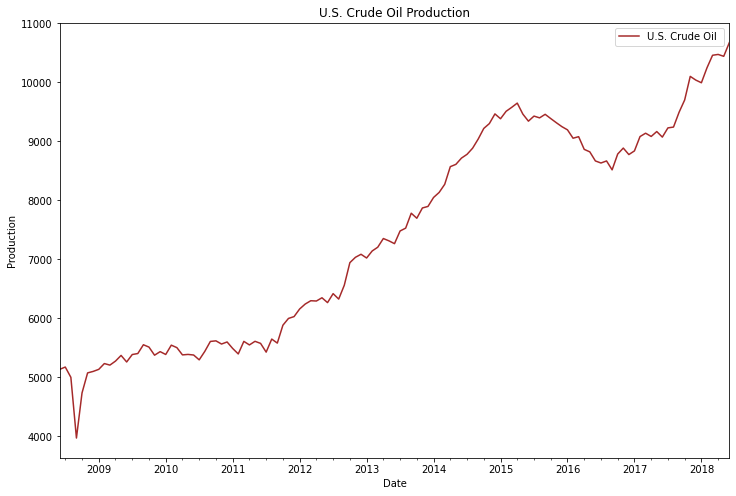

In [22]:
crude_oil_data.plot(x='Date', y='U.S. Crude Oil ', figsize=(12, 8), color='brown')

plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'U.S. Crude Oil Production')

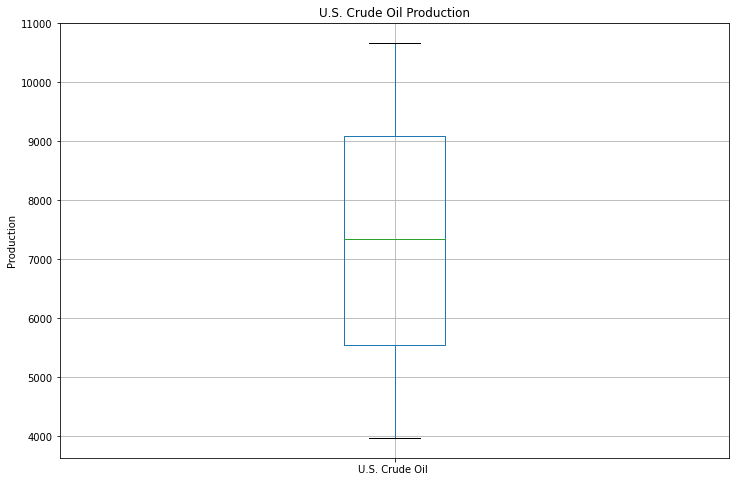

In [23]:
crude_oil_data.boxplot('U.S. Crude Oil ', figsize=(12, 8))

plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

Text(0.5, 1.0, 'California Crude Oil Production')

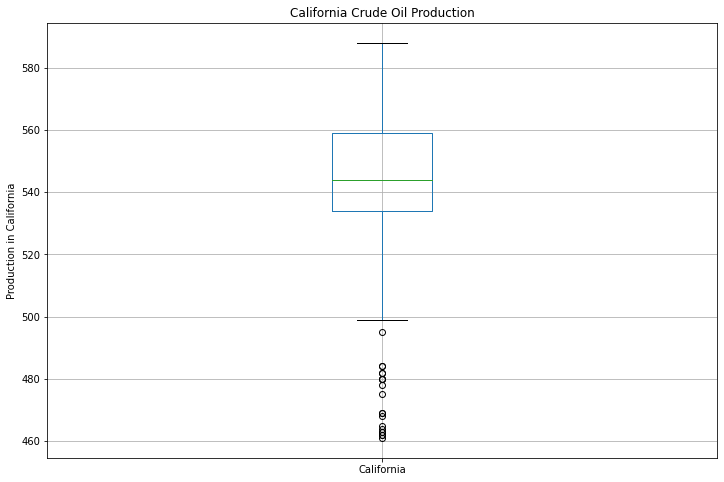

In [24]:
crude_oil_data[['California']].boxplot(figsize=(12,8))

plt.ylabel('Production in California')
plt.title('California Crude Oil Production')

Text(0.5, 1.0, 'Alaska, California Crude Oil Production')

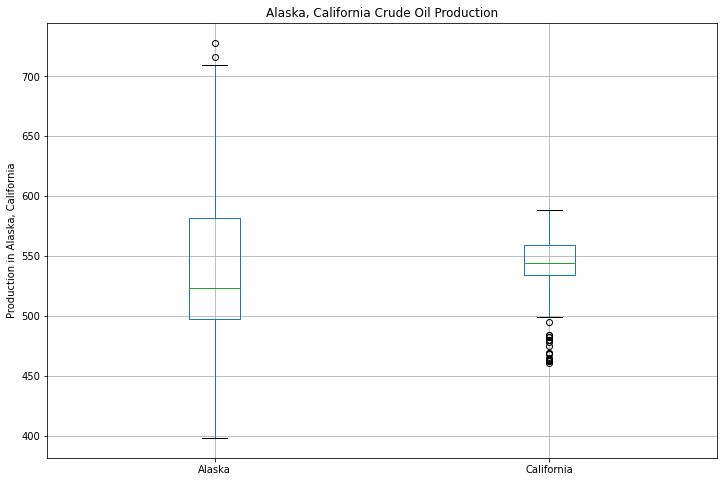

In [25]:
crude_oil_data[['Alaska', 'California']].boxplot(figsize=(12,8))

plt.ylabel('Production in Alaska, California')
plt.title('Alaska, California Crude Oil Production')

Text(0, 0.5, 'Production')

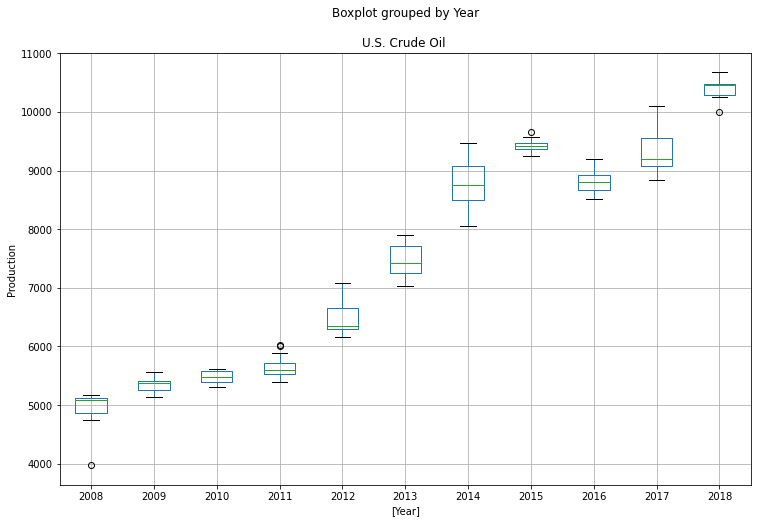

In [26]:
crude_oil_data.boxplot(column=['U.S. Crude Oil '], by=['Year'], figsize=(12, 8))

plt.ylabel('Production')

In [27]:
year_data = crude_oil_data.groupby('Year', as_index=False).sum()

year_data[['Year', 'U.S. Crude Oil ']]

,Year,U.S. Crude Oil
0,2008,34211
1,2009,64180
2,2010,65741
3,2011,67829
4,2012,78007
5,2013,89585
6,2014,105064
7,2015,113179
8,2016,105970
9,2017,112205


Text(0.5, 1.0, 'U.S. Crude Oil Production')

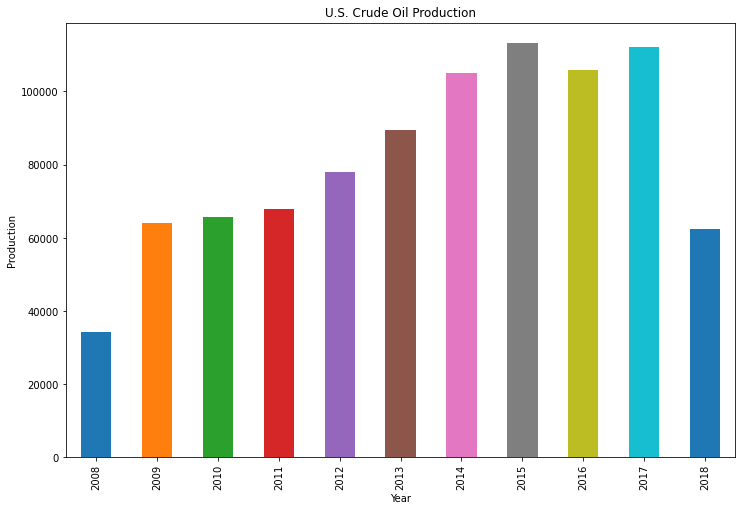

In [28]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

year_data.plot.bar(x='Year', y='U.S. Crude Oil ', figsize=(12,8), color=colors, legend=False)

plt.ylabel('Production')
plt.title('U.S. Crude Oil Production')

In [29]:
mean_prod_data = crude_oil_data.mean()[1:-3]

mean_prod_data

c:\programdata\anaconda3\envs\data-science-practice\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Alabama            22.958678
Alaska            540.404959
Arkansas           16.462810
California        536.388430
Colorado          212.115702
Mexico           1444.264463
Pacific            43.115702
Florida             5.190083
Idaho               0.066116
Illinois           25.008264
Indiana             5.619835
Kansas            114.520661
Kentucky            7.041322
Louisiana         177.404959
Michigan           18.016529
Mississippi        62.355372
Missouri            0.223140
Nebraska            6.966942
Montana            71.537190
Nevada              1.000000
New Mexico        305.495868
New York            1.000000
North Dakota      746.380165
Ohio               33.322314
Oklahoma          321.611570
Pennsylvania       13.876033
South Dakota        4.504132
Wyoming           180.429752
West Virginia      16.471074
Utah               85.148760
Texas            2403.826446
dtype: float64

In [30]:
mean_prod_data = mean_prod_data.sort_values(ascending=False)
mean_prod_data

Texas            2403.826446
Mexico           1444.264463
North Dakota      746.380165
Alaska            540.404959
California        536.388430
Oklahoma          321.611570
New Mexico        305.495868
Colorado          212.115702
Wyoming           180.429752
Louisiana         177.404959
Kansas            114.520661
Utah               85.148760
Montana            71.537190
Mississippi        62.355372
Pacific            43.115702
Ohio               33.322314
Illinois           25.008264
Alabama            22.958678
Michigan           18.016529
West Virginia      16.471074
Arkansas           16.462810
Pennsylvania       13.876033
Kentucky            7.041322
Nebraska            6.966942
Indiana             5.619835
Florida             5.190083
South Dakota        4.504132
Nevada              1.000000
New York            1.000000
Missouri            0.223140
Idaho               0.066116
dtype: float64

In [31]:
mean_prod_df = pd.DataFrame(mean_prod_data).reset_index()

mean_prod_df.columns = ['State', 'Production']

mean_prod_df.head(10)

,State,Production
0,Texas,2403.826446
1,Mexico,1444.264463
2,North Dakota,746.380165
3,Alaska,540.404959
4,California,536.388430
5,Oklahoma,321.611570
6,New Mexico,305.495868
7,Colorado,212.115702
8,Wyoming,180.429752
9,Louisiana,177.404959


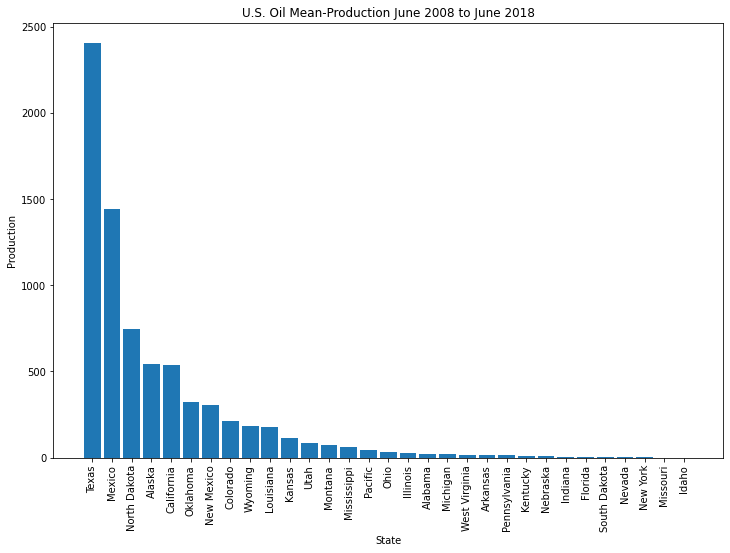

In [32]:
plt.figure(figsize=(12,8))

plt.bar(mean_prod_df['State'], mean_prod_df['Production'], width=0.85)

plt.title('U.S. Oil Mean-Production June 2008 to June 2018')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Production')

plt.show()

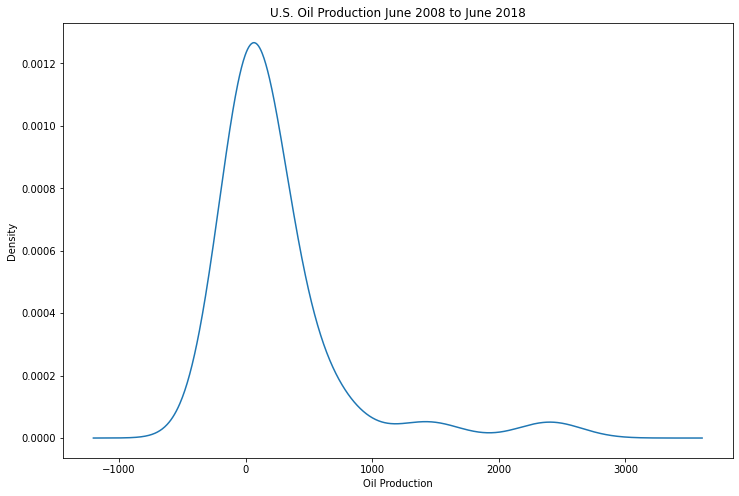

In [33]:
mean_prod_df['Production'].plot.kde(figsize=(12,8))

plt.title('U.S. Oil Production June 2008 to June 2018')
plt.xlabel('Oil Production')

plt.show()

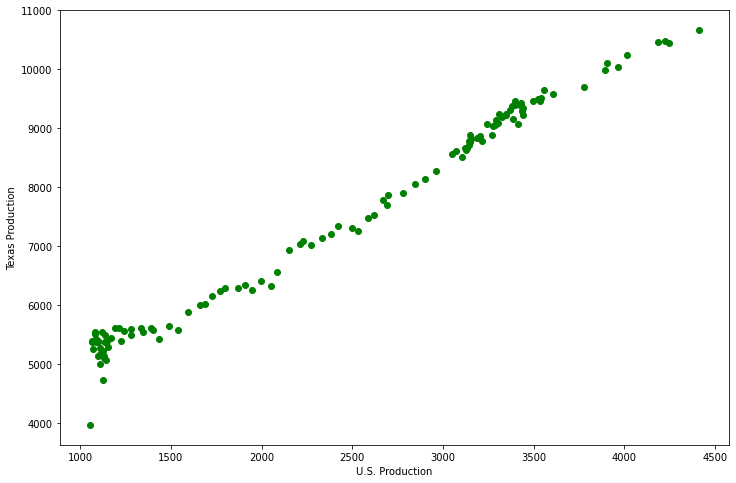

In [35]:
plt.figure(figsize=(12,8))

plt.scatter(crude_oil_data['Texas'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('U.S. Production')
plt.ylabel('Texas Production')

plt.show()

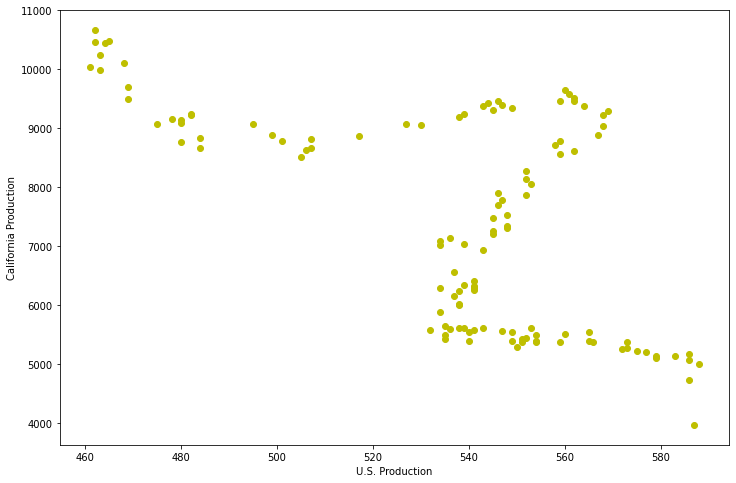

In [37]:
plt.figure(figsize=(12,8))

plt.scatter(crude_oil_data['California'], crude_oil_data['U.S. Crude Oil '], c='y')

plt.xlabel('U.S. Production')
plt.ylabel('California Production')

plt.show()

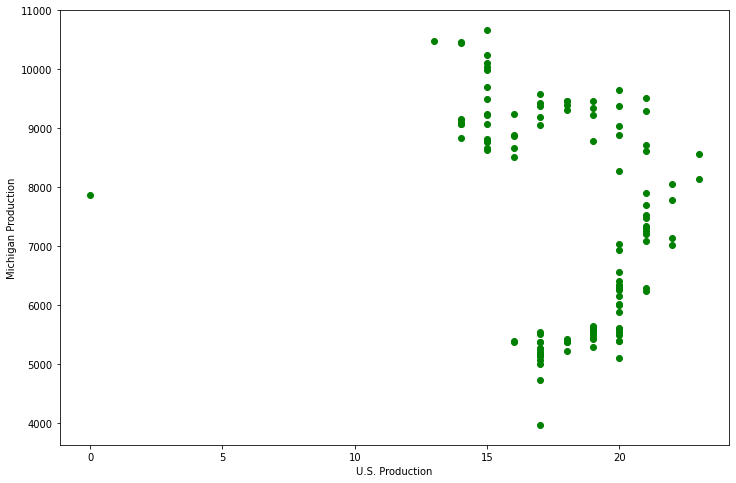

In [39]:
plt.figure(figsize=(12,8))

plt.scatter(crude_oil_data['Michigan'], crude_oil_data['U.S. Crude Oil '], c='g')

plt.xlabel('U.S. Production')
plt.ylabel('Michigan Production')

plt.show()